# Chapter 2 snippets

### snippet 2.0

Load Julia packages (libraries) needed

In [1]:
using StatisticalRethinking
gr(size=(600,300))

Plots.GRBackend()

snippet 2.6 (see snippet 3_2 for explanations)

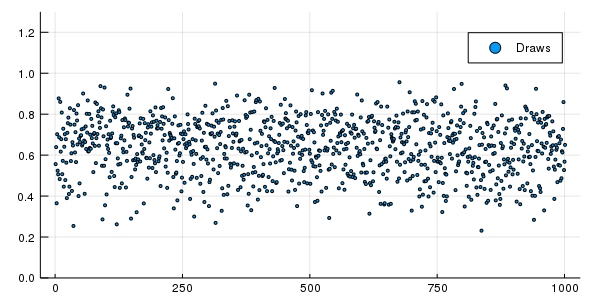

In [2]:
p_grid = range(0, step=0.001, stop=1)
prior = ones(length(p_grid))
likelihood = [pdf(Binomial(9, p), 6) for p in p_grid]
posterior = likelihood .* prior
posterior = posterior / sum(posterior)

samples = sample(p_grid, Weights(posterior), length(p_grid))

p = Vector{Plots.Plot{Plots.GRBackend}}(undef, 2)

p[1] = scatter(1:length(p_grid), samples, markersize = 2, ylim=(0.0, 1.3), lab="Draws")

analytical calculation

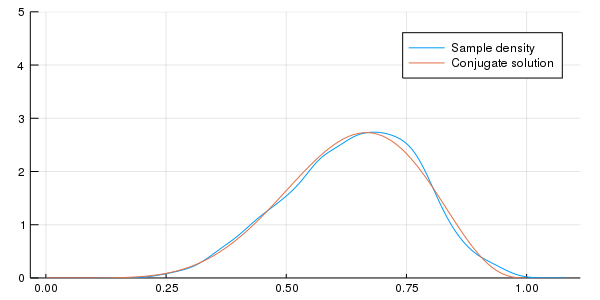

In [3]:
w = 6
n = 9
x = 0:0.01:1
p[2] = density(samples, ylim=(0.0, 5.0), lab="Sample density")
p[2] = plot!( x, pdf.(Beta( w+1 , n-w+1 ) , x ), lab="Conjugate solution")

quadratic approximation

In [4]:
plot!( p[2], x, pdf.(Normal( 0.67 , 0.16 ) , x ), lab="Normal approximation")
plot(p..., layout=(1, 2))
savefig("s2_6.pdf")

snippet 2.7
analytical calculation

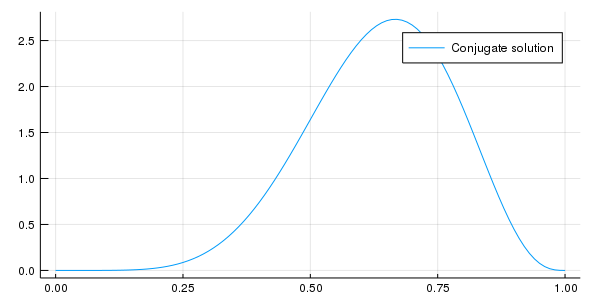

In [5]:
w = 6
n = 9
x = 0:0.01:1
plot( x, pdf.(Beta( w+1 , n-w+1 ) , x ), lab="Conjugate solution")

quadratic approximation

In [6]:
plot!( x, pdf.(Normal( 0.67 , 0.16 ) , x ), lab="Normal approximation")
savefig("s2_7.pdf")

snippet 2.8
The example is in stan_globe_toss.jl

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*